In [15]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#uplode csv file
df=pd.read_csv('salaries.csv')

In [17]:
#Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73148 non-null  int64 
 1   experience_level    73148 non-null  object
 2   employment_type     73148 non-null  object
 3   job_title           73148 non-null  object
 4   salary              73148 non-null  int64 
 5   salary_currency     73148 non-null  object
 6   salary_in_usd       73148 non-null  int64 
 7   employee_residence  73148 non-null  object
 8   remote_ratio        73148 non-null  int64 
 9   company_location    73148 non-null  object
 10  company_size        73148 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [18]:
#check null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [19]:
#check dupicates
df.duplicated().sum()

np.int64(39124)

In [20]:
#view duplicated rows
duplicates = df[df.duplicated(keep=False)]
duplicates

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
10,2025,SE,FT,Data Scientist,234000,USD,234000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
72990,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
72995,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S
73066,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L
73070,2021,EN,FT,Data Scientist,90000,USD,90000,US,100,US,S


In [21]:
#drop duplicates
df=df.drop_duplicates()

In [22]:
df.duplicated().sum()

np.int64(0)

In [23]:
#view first 5 rows as default
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M
5,2025,SE,FT,Engineer,106000,USD,106000,US,0,US,M
6,2025,SE,FT,Manager,360200,USD,360200,US,0,US,M


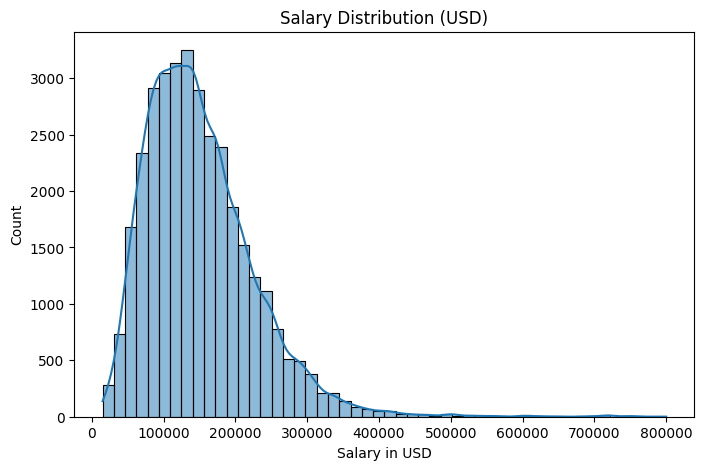

In [24]:
#Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Count")
plt.show()

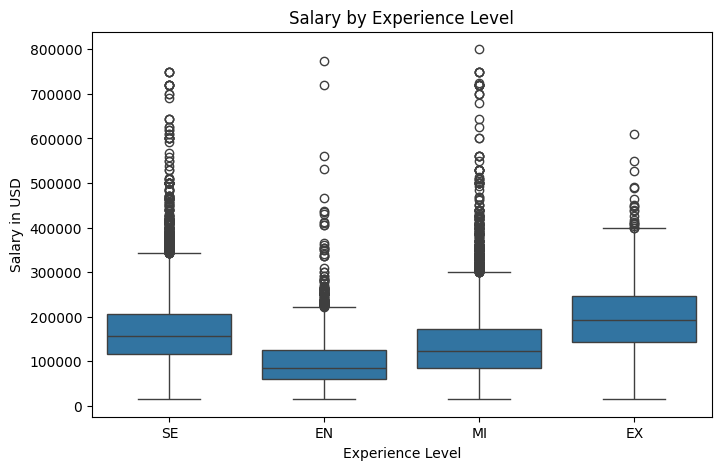

In [25]:
#Salary by Experience Level
plt.figure(figsize=(8,5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Salary in USD")
plt.show()

C:\Users\KAVIYAN C\AppData\Local\Temp\ipykernel_11616\591240822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")


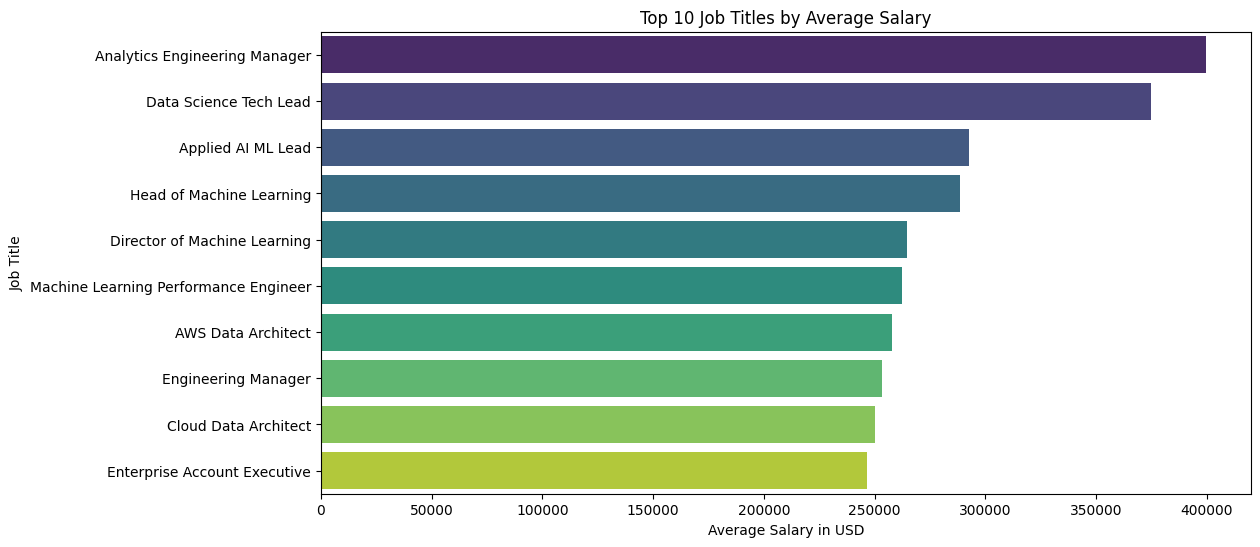

In [26]:
#Top 10 Job Titles with Highest Avg Salary
plt.figure(figsize=(12,6))
top_jobs = df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="viridis")
plt.title("Top 10 Job Titles by Average Salary")
plt.xlabel("Average Salary in USD")
plt.ylabel("Job Title")
plt.show()

In [27]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [28]:
df=df.drop(columns=['job_title', 'salary_currency', 'employee_residence', 'company_location'])

In [29]:
df.head(3)

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size
0,2025,SE,FT,170000,170000,0,M
1,2025,SE,FT,110000,110000,0,M
4,2025,SE,FT,143000,143000,0,M


In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


# -----------------------
# Encode categorical variables
# -----------------------
le = LabelEncoder()
df['experience_level'] = le.fit_transform(df['experience_level'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['company_size'] = le.fit_transform(df['company_size'])


# Features & Target
# -----------------------
x = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(x)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# -----------------------
# Linear Regression
# -----------------------
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)

print("\nLinear Regression Results")
print("----------------------------")
print("R2 Score:", lr_r2)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)

# -----------------------
# Random Forest Regressor
# -----------------------
rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Results")
print("----------------------------")
print("R2 Score:", rf_r2)

# -----------------------
# Decision Tree Regressor
# -----------------------
dt_model = DecisionTreeRegressor(max_depth=None, random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

dt_r2 = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Results")
print("----------------------------")
print("R2 Score:", dt_r2)

Shape of X_train: (27219, 6)
Shape of X_test: (6805, 6)
Shape of y_train: (27219,)
Shape of y_test: (6805,)

Linear Regression Results
----------------------------
R2 Score: 0.12519378382400448
Mean Squared Error: 4980520762.624142
Root Mean Squared Error: 70572.80469574765

Random Forest Results
----------------------------
R2 Score: 0.9816471330100699

Decision Tree Results
----------------------------
R2 Score: 0.9744623160116643


In [32]:
# Random Forest Hyperparameter Tuning
# -----------------------
rf_params = {
    "n_estimators": [50, 100, 200],        # number of trees
    "max_depth": [5, 10, 15, None],        # tree depth
    "min_samples_split": [2, 5, 10],       # min samples to split a node
    "min_samples_leaf": [1, 2, 4]          # min samples per leaf
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                       param_grid=rf_params,
                       cv=3,
                       scoring='r2',
                       n_jobs=-1,
                       verbose=1)

rf_grid.fit(x_train, y_train)

print("\nBest Random Forest Params:", rf_grid.best_params_)
print("Best Random Forest R2 Score:", rf_grid.best_score_)

# -----------------------
# Decision Tree Hyperparameter Tuning
# -----------------------
dt_params = {
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42),
                       param_grid=dt_params,
                       cv=3,
                       scoring='r2',
                       n_jobs=-1,
                       verbose=1)

dt_grid.fit(x_train, y_train)

print("\nBest Decision Tree Params:", dt_grid.best_params_)
print("Best Decision Tree R2 Score:", dt_grid.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits

Best Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest R2 Score: 0.9669209474553825
Fitting 3 folds for each of 36 candidates, totalling 108 fits

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Decision Tree R2 Score: 0.9618621806540029


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Build ANN Model
# -----------------------
model = Sequential()

# Input layer + 1st hidden layer
model.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model.add(Dropout(0.3))

# 2nd hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# 3rd hidden layer
model.add(Dense(32, activation='relu'))

# Output layer (regression → no activation)
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# -----------------------
# Train Model
# -----------------------
history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=20,
                    batch_size=32,
                    verbose=1)

# -----------------------
# Evaluate Model
# -----------------------
y_pred_ann = model.predict(x_test).flatten()

mse = mean_squared_error(y_test, y_pred_ann)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_ann)

print("\nANN Results")
print("----------------------------")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R2 Score:", r2)

Epoch 1/20


c:\Users\KAVIYAN C\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


851/851 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 15033955328.0000 - mae: 91323.7031 - val_loss: 5608518656.0000 - val_mae: 50558.4023
Epoch 2/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6187543040.0000 - mae: 51994.6367 - val_loss: 5326258176.0000 - val_mae: 50367.8906
Epoch 3/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5886780416.0000 - mae: 52188.0391 - val_loss: 5192012800.0000 - val_mae: 50575.3164
Epoch 4/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5780490240.0000 - mae: 52375.3164 - val_loss: 5103776256.0000 - val_mae: 50771.2109
Epoch 5/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5618316288.0000 - mae: 52372.5469 - val_loss: 5055499776.0000 - val_mae: 50820.9648
Epoch 6/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5586909184.0000 - mae: 52509.9219 - val_loss: 5026223104.0000 - val_mae: 50873.5938
Epoch 7/20
851/851 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5557804544.0000 - mae: 52669.6641 - val_loss: 4985383424.0000 - val_mae: 51375.3438
Ep